# Shapely

Information about Shapely can be found at [https://shapely.readthedocs.io/en/stable/index.html](https://shapely.readthedocs.io/en/stable/index.html).


Information about GEOS can be found at [https://libgeos.org/](https://libgeos.org/).



In [ ]:
# Import dependencies
#from shapely.geometry import Point, LineString, Polygon, MultiPolygon
import shapely

# Other actors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import pyproj
import json

#from shapely.geometry import mapping
#from shapely.geometry import Polygon, MultiPolygon
#from shapely.ops import transform
#from pyproj import Transformer

# 2. Creating Geometries

In [3]:
## Points
# Create a point
ex_point = shapely.geometry.Point(1.5, 2.5)
#
print(ex_point)
print("-" * 50)
print(type(ex_point))

POINT (1.5 2.5)
--------------------------------------------------
<class 'shapely.geometry.point.Point'>


In [4]:
## LineStrings
# Create a line (sequence of points)
ex_lines = shapely.geometry.LineString([(-2, 1), (1, 2), (2, 0), (3, 2)])
#
print(ex_lines)
print("-" * 50)
print(type(ex_lines))

LINESTRING (-2 1, 1 2, 2 0, 3 2)
--------------------------------------------------
<class 'shapely.geometry.linestring.LineString'>


In [61]:
## Polygons
# Create a polygon
ex_poly = shapely.geometry.Polygon([(-1, 0), (1, 1), (1, 0)])
#
#ex_poly = shapely.geometry.Polygon([(-1, 0), (1, 1), (1, 0), (-1, 0)])
#
print(ex_poly)
print("-" * 50)
print(type(ex_poly))

POLYGON ((-1 0, 1 1, 1 0, -1 0))
--------------------------------------------------
<class 'shapely.geometry.polygon.Polygon'>


In [ ]:
# Create a multipolygon
# Create a multipolygon
polygon1 = shapely.geometry.Polygon([(0, 0), (4, 0), (4, 4), (0, 4)])
polygon2 = shapely.geometry.Polygon([(5, 5), (7, 5), (7, 7), (5, 7)])
#
#polygon1 = shapely.geometry.Polygon([(0, 0), (4, 0), (4, 4), (0, 4), (0, 0)])
#polygon2 = shapely.geometry.Polygon([(5, 5), (7, 5), (7, 7), (5, 7), (5, 5)])
#
ex_mpoly = shapely.geometry.MultiPolygon([polygon1, polygon2])
#
print(ex_mpoly)
print("-" * 50)
print(type(ex_poly))

MULTIPOLYGON (((0 0, 4 0, 4 4, 0 4, 0 0)), ((5 5, 7 5, 7 7, 5 7, 5 5)))
--------------------------------------------------
<class 'shapely.geometry.polygon.Polygon'>


In [9]:
# Polygons have an important attribute .exterior and .xy
print(ex_poly.exterior)
print(ex_poly.exterior.xy)

LINEARRING (0 0, 1 1, 1 0, 0 0)
(array('d', [0.0, 1.0, 1.0, 0.0]), array('d', [0.0, 1.0, 0.0, 0.0]))


In [16]:
# MultiPolygons are a special type of type known as a GeometrySequence
print(ex_mpoly.geoms)
print(type(ex_mpoly.geoms))

# They are indexable
print("\nIndividual geometries in ex_mpoly:")
print(ex_mpoly.geoms[0])
print(ex_mpoly.geoms[1])

<class 'shapely.geometry.base.GeometrySequence'>

Individual geometries in ex_mpoly:
POLYGON ((0 0, 4 0, 4 4, 0 4, 0 0))
POLYGON ((5 5, 7 5, 7 7, 5 7, 5 5))


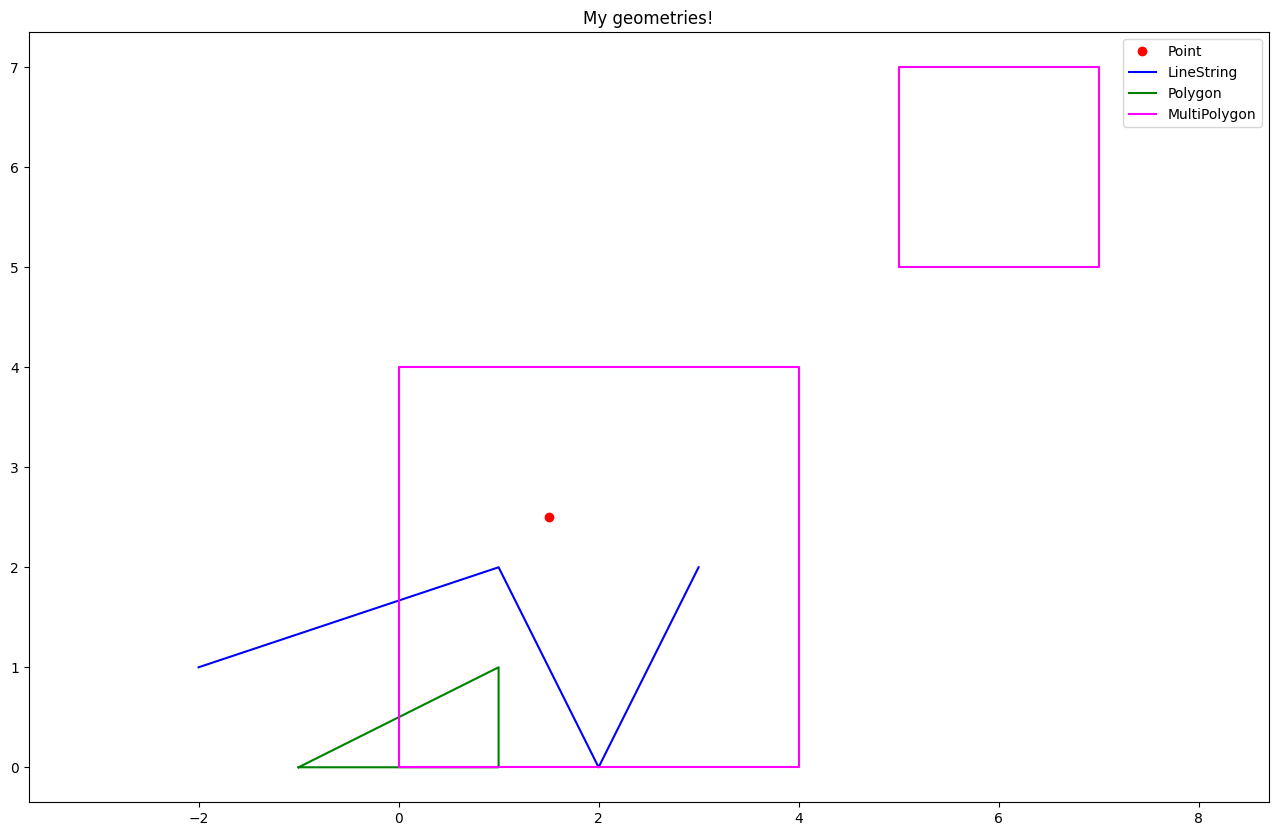

In [62]:
# Create a plot
# Geometries are visual thingies
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
ax.set_aspect(aspect="equal", adjustable="datalim")

# Plot the point
ax.plot(*ex_point.xy, marker="o", color="red", linestyle="None", label="Point")

# Plot the LineString
ax.plot(ex_lines.xy[0], ex_lines.xy[1], linestyle="-", color="blue", label="LineString")

# Plot the Polygon
ax.plot(ex_poly.exterior.xy[0], ex_poly.exterior.xy[1], color="green", linestyle="-", label="Polygon")

# Plot the MultiPolygon
for idx, poly in enumerate(ex_mpoly.geoms):
    ax.plot(poly.exterior.xy[0], poly.exterior.xy[1], color="magenta", linestyle="-", label="MultiPolygon" if idx == 0 else None)
#    ax.plot(poly.exterior.xy[0], poly.exterior.xy[1], color="magenta", linestyle="--", label="MultiPolygon")

# Finalize plot
ax.legend()
ax.set_title(label="My geometries!")
plt.show()

# Geometries have attributes

In [21]:
# For the Point
print("Length and area values for the Point")
print(ex_point.length)
print(ex_point.area)

# For the LineString
print("\nLength and area values for the LineString")
print(ex_lines.length)
print(ex_lines.area)

# For the Polygon
print("\nLength and area values for the Polygon")
print(ex_poly.length)
print(ex_poly.area)

# For the MultiPolygon
print("\nLength and area values for the MultiPolygon")
print(ex_mpoly.length)
print(ex_mpoly.area)

# For each Polygon in the MultiPolygon
print("\nLength and area values for each Polygon in the MultiPolygon LISTO EXPANSIONO")
print([poly.length for poly in ex_mpoly.geoms])
print([poly.area for poly in ex_mpoly.geoms])


Length and area values for the Point
0.0
0.0

Length and area values for the LineString
7.63441361516796
0.0

Length and area values for the Polygon
3.414213562373095
0.5

Length and area values for the MultiPolygon
24.0
20.0

Length and area values for each Polygon in the MultiPolygon LISTO EXPANSIONO
[16.0, 8.0]
[16.0, 4.0]


In [ ]:
# Dumb example but worth checking
ex_poly.contains(ex_poly.centroid)

In [ ]:
ex_poly.exterior.xy[0]
ex_poly.exterior.xy[1]

# BUFFERO

In [23]:
# Buffer the Point
buff_point = ex_point.buffer(distance=2)

# Print information about it!
print(buff_point)
print(type(buff_point))

POLYGON ((3.5 2.5, 3.490369453344394 2.3039657193408787, 3.461570560806461 2.1098193559677436, 3.4138806714644176 1.9194306454910754, 3.3477590650225735 1.7346331352698203, 3.26384252869671 1.5572065263480046, 3.1629392246050907 1.3888595339607956, 3.0460209067254738 1.231213431672709, 2.914213562373095 1.0857864376269049, 2.768786568327291 0.9539790932745262, 2.6111404660392044 0.8370607753949095, 2.442793473651996 0.7361574713032901, 2.2653668647301797 0.6522409349774265, 2.0805693545089246 0.5861193285355821, 1.8901806440322566 0.5384294391935391, 1.6960342806591215 0.5096305466556064, 1.5 0.5, 1.3039657193408787 0.5096305466556061, 1.1098193559677436 0.5384294391935391, 0.9194306454910757 0.5861193285355821, 0.7346331352698205 0.6522409349774265, 0.5572065263480046 0.7361574713032899, 0.3888595339607961 0.8370607753949093, 0.2312134316727092 0.9539790932745258, 0.0857864376269051 1.0857864376269049, -0.046020906725474 1.231213431672709, -0.1629392246050907 1.3888595339607956, -0.26

In [22]:
# Buffer the LineString
buff_lines = ex_lines.buffer(distance=1)

# Print information about it!
print(buff_lines)
print(type(buff_lines))

POLYGON ((0.683772233983162 2.948683298050514, 0.7754408553262492 2.9744604612519656, 0.8691456887837105 2.9914016084494266, 0.9640370565687038 2.9993531241256806, 1.0592545218777583 2.9982429071308436, 1.1539346909860533 2.9880810244666316, 1.2472190421548763 2.9689596200028285, 1.3382617103618626 2.941052078953693, 1.4262371572652215 2.9046114556904876, 1.5103476568537841 2.8599681791460965, 1.589830528906012 2.8075270566182002, 1.6639650546678628 2.7477636031393224, 1.7320790120409277 2.681219729697532, 1.7935547710223734 2.608498829405307, 1.847834894125696 2.530260306173176, 1.8944271909999157 2.447213595499958, 2 2.2360679774997894, 2.1055728090000843 2.447213595499958, 2.1537143181439746 2.53272933529653, 2.210006021030951 2.6131146003747183, 2.2739057977900368 2.687595236688764, 2.3447982586398712 2.7554539549957067, 2.4220006704287087 2.8160372387429007, 2.504769531727891 2.8687616377896688, 2.592307733157046 2.913119387351103, 2.683772233983162 2.948683298050514, 2.7782821810

In [27]:
# Buffer the MultiPolygon
buff_poly = ex_poly.buffer(distance=0.1)

# Print information about it!
print(buff_poly)
print(type(buff_poly))

POLYGON ((0 -0.1, -0.009801714032956 -0.0995184726672197, -0.0195090322016129 -0.098078528040323, -0.0290284677254462 -0.0956940335732209, -0.038268343236509 -0.0923879532511286, -0.0471396736825998 -0.0881921264348355, -0.0555570233019602 -0.0831469612302545, -0.0634393284163646 -0.0773010453362737, -0.0707106781186548 -0.0707106781186548, -0.0773010453362737 -0.0634393284163645, -0.0831469612302546 -0.0555570233019602, -0.0881921264348355 -0.0471396736825998, -0.0923879532511287 -0.038268343236509, -0.0956940335732209 -0.0290284677254462, -0.098078528040323 -0.0195090322016128, -0.0995184726672197 -0.0098017140329561, -0.1 0, -0.0995184726672197 0.0098017140329561, -0.098078528040323 0.0195090322016129, -0.0956940335732209 0.0290284677254462, -0.0923879532511287 0.038268343236509, -0.0881921264348355 0.0471396736825998, -0.0831469612302545 0.0555570233019602, -0.0773010453362737 0.0634393284163646, -0.0707106781186548 0.0707106781186548, 0.9292893218813453 1.0707106781186548, 0.93656

In [24]:
# Buffer the MultiPolygon
buff_mpoly = ex_mpoly.buffer(distance=0.5)

# Print information about it!
print(buff_mpoly)
print(type(buff_mpoly))

MULTIPOLYGON (((4.5 5, 4.5 7, 4.502407636663902 7.04900857016478, 4.509607359798385 7.097545161008064, 4.521529832133895 7.145142338627231, 4.538060233744357 7.191341716182545, 4.5590393678258225 7.235698368412999, 4.5842651938487275 7.277785116509801, 4.613494773318632 7.317196642081822, 4.646446609406726 7.353553390593274, 4.682803357918178 7.386505226681368, 4.722214883490199 7.4157348061512725, 4.764301631587001 7.4409606321741775, 4.808658283817455 7.461939766255643, 4.854857661372769 7.478470167866105, 4.902454838991936 7.490392640201615, 4.95099142983522 7.497592363336098, 5 7.5, 7 7.5, 7.04900857016478 7.497592363336098, 7.097545161008064 7.490392640201615, 7.145142338627231 7.478470167866105, 7.191341716182545 7.461939766255643, 7.235698368412999 7.4409606321741775, 7.2777851165098015 7.4157348061512725, 7.317196642081822 7.386505226681368, 7.353553390593274 7.353553390593274, 7.386505226681368 7.317196642081822, 7.4157348061512725 7.277785116509801, 7.4409606321741775 7.23569

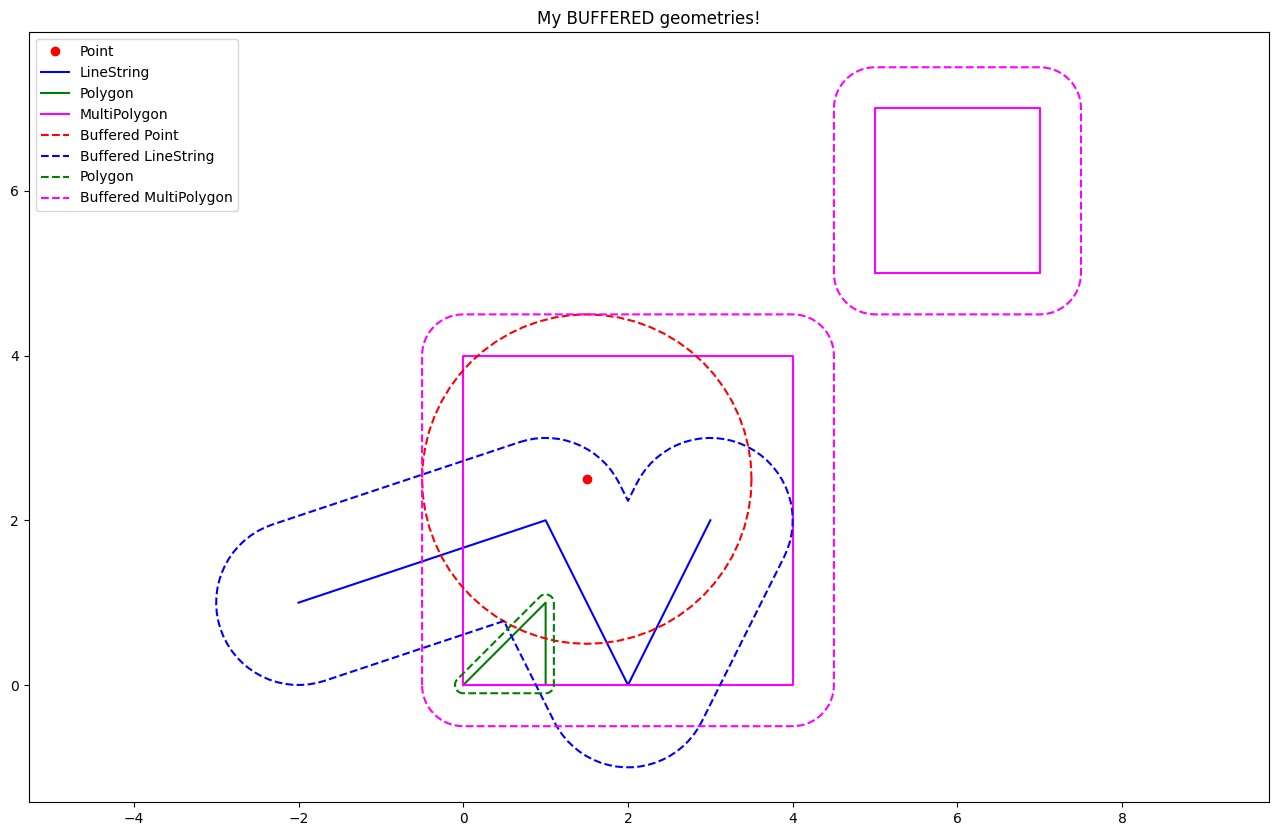

In [31]:
# Create a plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
ax.set_aspect(aspect="equal", adjustable="datalim")

###########################################ORIGINAL GEOMETRIES
# Plot the point
ax.plot(*ex_point.xy, marker="o", color="red", linestyle="None", label="Point")

# Plot the LineString
ax.plot(ex_lines.xy[0], ex_lines.xy[1], linestyle="-", color="blue", label="LineString")

# Plot the Polygon
ax.plot(ex_poly.exterior.xy[0], ex_poly.exterior.xy[1], color="green", linestyle="-", label="Polygon")

# Plot the MultiPolygon
for idx, poly in enumerate(ex_mpoly.geoms):
    ax.plot(poly.exterior.xy[0], poly.exterior.xy[1], color="magenta", linestyle="-", label="MultiPolygon" if idx == 0 else None)

###########################################BUFFERED GEOMETRIES
# Plot the buffered Point (now a Polygon)
ax.plot(buff_point.exterior.xy[0], buff_point.exterior.xy[1], color="red", linestyle="--", label="Buffered Point")

# Plot the buffered LineString (now a Polygon)
ax.plot(buff_lines.exterior.xy[0], buff_lines.exterior.xy[1], color="blue", linestyle="--", label="Buffered LineString")

# Plot the Polygon
ax.plot(buff_poly.exterior.xy[0], buff_poly.exterior.xy[1], color="green", linestyle="--", label="Polygon")

# Plot the buffered MultiPolygon
for idx, poly in enumerate(buff_mpoly.geoms):
    ax.plot(poly.exterior.xy[0], poly.exterior.xy[1], color="magenta", linestyle="--", label="Buffered MultiPolygon" if idx == 0 else None)

# Finalize plot
ax.legend()
ax.set_title(label="My BUFFERED geometries!")
plt.show()


# Shapely is not just graphic

In [35]:
# You can also perform logical operations
# Contains determines whether or not a point is within a polygon
print("Does the Polygon contain the Point?")
print(ex_poly.contains(other=ex_point))

print("\nDoes the MultiPolygon contain the Point?")
print(ex_mpoly.contains(other=ex_point))

Does the Polygon contain the Point?
False

Does the MultiPolygon contain the Point?
True


In [34]:
# You can also perform logical operations
print("Is the Point within the Polygon?")
print(ex_point.within(other=ex_poly))

print("\nIs the Point within the MultiPolygon?")
print(ex_point.within(other=ex_mpoly))

Is the Point within the Polygon?
False

Is the Point within the MultiPolygon?
True


In [38]:
# Combine it with buffering, and you can create statements of the sort
print("Is the Point within 1 unit of the LineString?")
print(ex_point.within(other=buff_lines))


print("\nIs the Point within 0.5 unit of the first Polygon in MultiPolygon?")
print(ex_point.within(other=buff_mpoly.geoms[0]))

Is the Point within 1 unit of the LineString?
True

Is the Point within 0.5 unit of the first Polygon in MultiPolygon?
False


# SET OPERATIONS

In [83]:
union_poly = ex_poly.union(other=ex_mpoly)
#
inter_poly = ex_poly.intersection(other=ex_mpoly)
#
diff_poly = ex_poly.difference(other=ex_mpoly)
#
symdiff_poly = ex_poly.symmetric_difference(other=ex_mpoly)

In [71]:
print(union_poly)

MULTIPOLYGON (((0 0.5, 0 4, 4 4, 4 0, 1 0, 0 0, -1 0, 0 0.5)), ((5 7, 7 7, 7 5, 5 5, 5 7)))


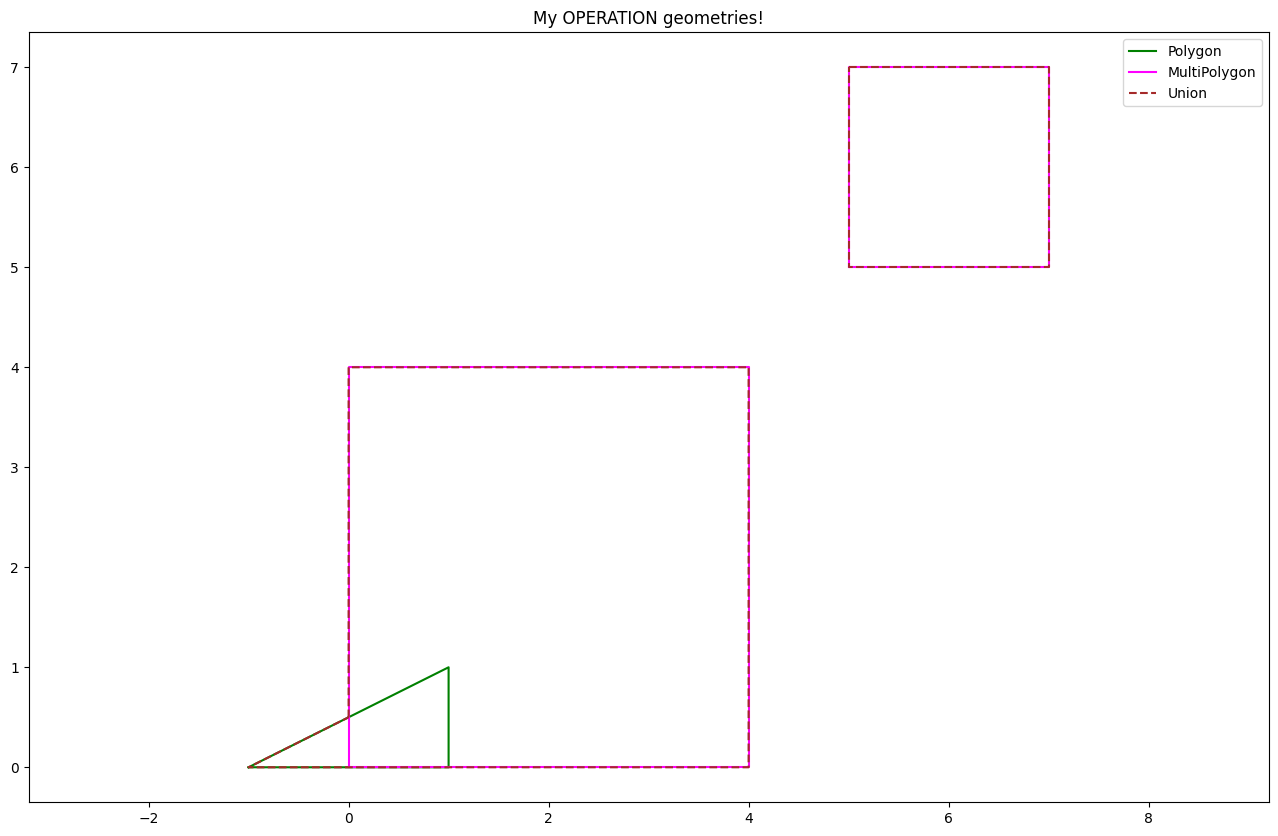

In [106]:
# Create a plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
ax.set_aspect(aspect="equal", adjustable="datalim")


# Plot the Polygon
ax.plot(ex_poly.exterior.xy[0], ex_poly.exterior.xy[1], color="green", linestyle="-", label="Polygon")

# Plot the MultiPolygon
for idx, poly in enumerate(ex_mpoly.geoms):
    ax.plot(poly.exterior.xy[0], poly.exterior.xy[1], color="magenta", linestyle="-", label="MultiPolygon" if idx == 0 else None)

# Plot the UNION
for idx, poly in enumerate(union_poly.geoms):
    ax.plot(poly.exterior.xy[0], poly.exterior.xy[1], color="brown", linestyle="--", label="Union" if idx == 0 else None)

# Plot the INTERSECTION
#ax.plot(inter_poly.exterior.xy[0], inter_poly.exterior.xy[1], color="brown", linestyle="--", label="Intersection")

# Plot the DIFFERENCE
#ax.plot(diff_poly.exterior.xy[0], diff_poly.exterior.xy[1], color="brown", linestyle="--", label="Difference")

# Plot the SYMMETRIC DIFFERENCE
#for idx, poly in enumerate(symdiff_poly.geoms):
#    ax.plot(poly.exterior.xy[0], poly.exterior.xy[1], color="brown", linestyle="--", label="SymDiff" if idx == 0 else None)

# Finalize plot
ax.legend()
ax.set_title(label="My OPERATION geometries!")
plt.show()


# Real world application

In [39]:
# Get amphibian distribution area from Quebec
# Note: you don't need to know about GeoPandas until a while (more like couple of minutes)
gdf_amp = gpd.read_file(filename="https://diffusion.mffp.gouv.qc.ca/Diffusion/DonneeGratuite/Faune/Aires_repartition/Amphibien/SQLite/Aires_repartition_amphibiens.sqlite")
amph_geom = gdf_amp.geometry
amph_crs = gdf_amp.crs

In [41]:
# For now, suppose you have geometries and know their CRS

print("CRS for the amphibian geometries:")
print(amph_crs)
print(type(amph_crs))
print(amph_crs.is_projected)
print(amph_crs.area_of_use)

CRS for the amphibian geometries:
EPSG:32198
<class 'pyproj.crs.crs.CRS'>
True
- name: Canada - Quebec.
- bounds: (-79.85, 44.99, -57.1, 62.62)


In [53]:
# What is amph_geom?
print(amph_geom.head())
print("\nType of amph_geom:", type(amph_geom.geometry))
print("Type of amph_geom[0]:", type(amph_geom.geometry[0]))

0    MULTIPOLYGON (((-485026.718 132619.355, -48500...
1    MULTIPOLYGON (((-485026.718 132619.355, -48500...
2    MULTIPOLYGON (((-485026.718 132619.355, -48500...
3    MULTIPOLYGON (((-485026.718 132619.355, -48500...
4    MULTIPOLYGON (((-485026.718 132619.355, -48500...
Name: geometry, dtype: geometry

Type of amph_geom: <class 'geopandas.geoseries.GeoSeries'>
Type of amph_geom[0]: <class 'shapely.geometry.multipolygon.MultiPolygon'>


In [ ]:
# Look at the first one
amph_geom[0]

In [54]:
# Get geometries
#
# lysi = Lithobates sylvaticus, Wood frog
# anam = Anaxyrus americanus, American toad
# lipa = Lithobates palustris, Leopard frog
#
lysi = amph_geom[0]
anam = amph_geom[1]
lipa = amph_geom[2]

In [56]:
# Print number of geometries in each MultiPolygon
print("Number of geometries in lysi:", len(lysi.geoms))
print("Number of geometries in anam:", len(anam.geoms))
print("Number of geometries in lipa:", len(lipa.geoms))

Number of geometries in lysi: 28
Number of geometries in anam: 28
Number of geometries in lipa: 25


In [ ]:
# Plot them
# Geometries are visual thingies (bis)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
ax.set_aspect(aspect="equal", adjustable="datalim")

for idx, polygon in enumerate(lysi.geoms):
    ax.plot(polygon.exterior.xy[0], polygon.exterior.xy[1], color="blue", label="Lithobates sylvaticus" if idx == 0 else None, linewidth=0.5)

for idx, polygon in enumerate(anam.geoms):
    ax.plot(polygon.exterior.xy[0], polygon.exterior.xy[1], color="green", label="Anaxyrus americanus" if idx == 0 else None, linewidth=0.5)

for idx, polygon in enumerate(lipa.geoms):
    ax.plot(polygon.exterior.xy[0], polygon.exterior.xy[1], color="red", label="Lithobates palustris" if idx == 0 else None, linewidth=0.5)

ax.set_aspect(aspect="equal")
ax.legend()
ax.set_title(label="Distribution areas for three amphibian species in Quebec")

plt.show()

In [60]:
# Get some operations
ope_1 = lysi & anam & lipa
#ope_1 = lysi.union(anam.union(lipa))
#
ope_2 = lysi - anam
#ope_2 = lysi.difference(anam)
#
ope_3 = anam - (lysi | lipa)
#ope_3 = anam.difference(lysi.union(lipa))

c:\Users\elami\OneDrive\Desktop\pywork\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


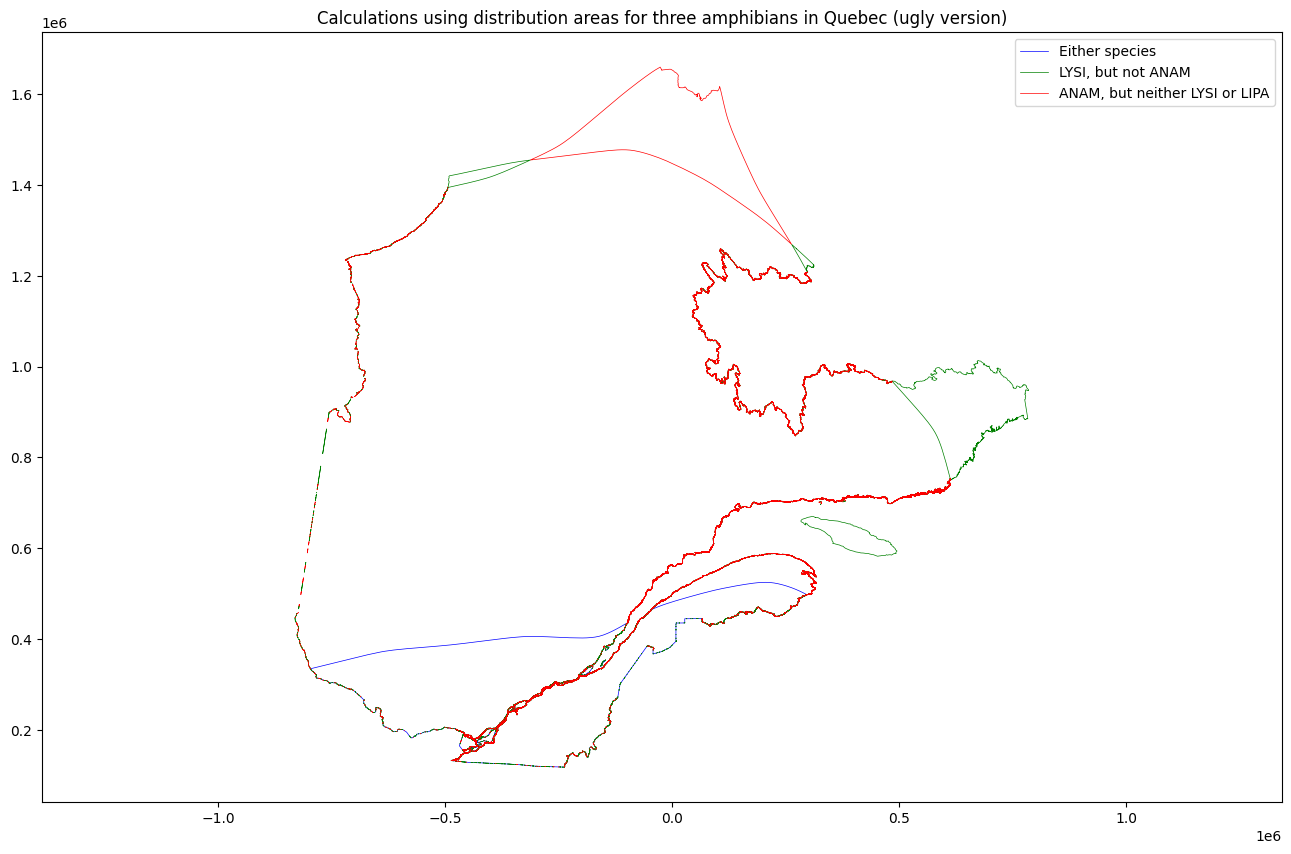

In [107]:
# Plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
ax.set_aspect(aspect="equal", adjustable="datalim")

for idx, polygon in enumerate(ope_1.geoms):
    if isinstance(polygon, shapely.geometry.Polygon):
        ax.plot(polygon.exterior.xy[0], polygon.exterior.xy[1], color="blue", label="Either species" if idx == 0 else None, linewidth=0.5)

for idx, polygon in enumerate(ope_2.geoms):
    if isinstance(polygon, shapely.geometry.Polygon):
        ax.plot(polygon.exterior.xy[0], polygon.exterior.xy[1], color="green", label="LYSI, but not ANAM" if idx == 0 else None, linewidth=0.5)

for idx, polygon in enumerate(ope_3.geoms):
    if isinstance(polygon, shapely.geometry.Polygon):
        ax.plot(polygon.exterior.xy[0], polygon.exterior.xy[1], color="red", label="ANAM, but neither LYSI or LIPA" if idx == 0 else None, linewidth=0.5)

ax.set_aspect(aspect="equal")
ax.legend()
ax.set_title(label="Calculations using distribution areas for three amphibians in Quebec (ugly version)")
plt.show()

In [118]:
# Print basic info for each operation
#
print("# of geoms in ope_1:", len(ope_1.geoms))
print("# geoms with area < 1m^2 in ope_1:", sum(1 for poly in ope_1.geoms if poly.area < 1.0))
#
print("\n# of geoms in ope_2:", len(ope_2.geoms))
print("# geoms with area < 1m^2 in ope_1:", sum(1 for poly in ope_2.geoms if poly.area < 1.0))
#
print("\n# of geoms in ope_3:", len(ope_3.geoms))
print("# geoms with area < 1m^2 in ope_1:", sum(1 for poly in ope_3.geoms if poly.area < 1.0))


# of geoms in ope_1: 27
# geoms with area < 1m^2 in ope_1: 2

# of geoms in ope_2: 52700
# geoms with area < 1m^2 in ope_1: 52692

# of geoms in ope_3: 38695
# geoms with area < 1m^2 in ope_1: 38694


In [119]:
# Write small but HELPFUL function
def filter_by_area(geom, min_area=0):
    return [polygon for polygon in geom.geoms if isinstance(polygon, shapely.geometry.Polygon) and polygon.area >= min_area]

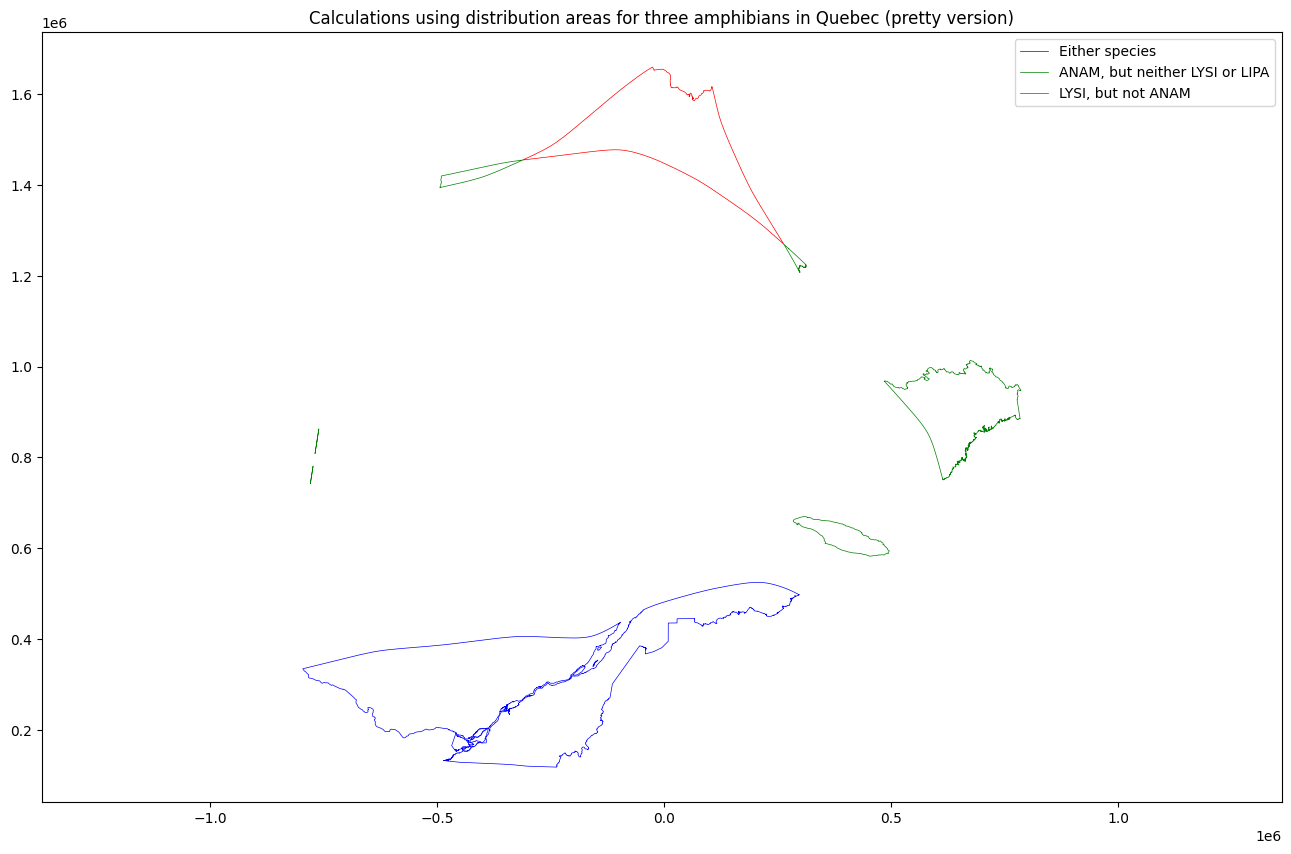

In [124]:
# Plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
ax.set_aspect(aspect="equal", adjustable="datalim")

# Set a cutoff value
cutoff_val = 1.0

for idx, polygon in enumerate(filter_by_area(geom=ope_1, min_area=cutoff_val)):
        ax.plot(polygon.exterior.xy[0], polygon.exterior.xy[1], color="blue", label="Either species" if idx == 0 else None, linewidth=0.5)

for idx, polygon in enumerate(filter_by_area(geom=ope_2, min_area=cutoff_val)):
        ax.plot(polygon.exterior.xy[0], polygon.exterior.xy[1], color="green", label="ANAM, but neither LYSI or LIPA" if idx == 0 else None, linewidth=0.5)

for idx, polygon in enumerate(filter_by_area(geom=ope_3, min_area=cutoff_val)):
        ax.plot(polygon.exterior.xy[0], polygon.exterior.xy[1], color="red", label="LYSI, but not ANAM" if idx == 0 else None, linewidth=0.5)

ax.set_aspect(aspect="equal")
ax.legend()
ax.set_title(label="Calculations using distribution areas for three amphibians in Quebec (pretty version)")
plt.show()

# TESTO

In [ ]:
import pandas as pd
df_104 = pd.read_csv(filepath_or_buffer="../data/KOR0104-43589.csv")
turtle_linestring = LineString(df_104[["location-lat", "location-long"]].values.tolist())

In [ ]:
import pandas as pd
df_104 = pd.read_csv(filepath_or_buffer="../data/KOR0104-43589.csv")
turtle_linestring = LineString(df_104[["location-lat", "location-long"]].values.tolist())

# Get the x and y coordinates of the LineString
x, y = turtle_linestring.xy

# Plotting the LineString
plt.plot(x, y, marker='o', color='b', label='LineString')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('LineString Plot')
plt.legend()
plt.grid(True)
plt.show()


# HANDO PYPROJO

In [129]:
# Load GeoJSON file in data/ folder
with open(file="../data/dinagat.geojson", mode="r") as f:
    geojson_dico = json.load(fp=f)

In [130]:
print(geojson_dico)
print(type(geojson_dico))

{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [125.6, 10.1]}, 'properties': {'name': 'Dinagat Islands'}}
<class 'dict'>


In [131]:
geojson_dico

{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [125.6, 10.1]},
 'properties': {'name': 'Dinagat Islands'}}

In [133]:
# Extract the "geometry" key of the dictionary and use
# the shape() function to transform it into a shapely geometry
dinagat_point = shapely.ops.shape(geojson_dico["geometry"])

# Print it!
print(dinagat_point)
print(type(dinagat_point))

POINT (125.6 10.1)
<class 'shapely.geometry.point.Point'>


In [139]:
# Select geometry for Pseudacris triseta, western chorus frog
pstr = amph_geom[10]

# Look at it!
print(pstr)

MULTIPOLYGON (((-422129.2027999982 162675.43659999967, -422010.96379999816 162515.45960000157, -421998.97900000215 162514.61279999837, -421986.5623999983 162519.7606999986, -421983.3589999974 162522.5610000007, -421982.07930000126 162526.48279999942, -421981.7226999998 162531.4785999991, -421978.03410000354 162541.246199999, -421963.5476000011 162561.33419999853, -421957.0678000003 162567.90590000153, -421948.7973999977 162571.32919999957, -421924.8835000023 162568.63549999893, -421897.91889999807 162566.71680000052, -421893.7729000002 162568.44159999862, -421889.49599999934 162572.1656000018, -421884.29599999636 162574.8156999983, -421883.01630000025 162578.73739999905, -421884.45269999653 162586.85390000045, -421884.09619999677 162591.84980000183, -421882.74140000343 162596.77039999887, -421882.3849999979 162601.76619999856, -421875.9052999988 162608.33799999952, -421873.6252999976 162612.21240000054, -421870.34889999777 162615.9838999994, -421866.127700001 162618.70749999955, -42186

In [ ]:
# Define transformer from NAD83 to WGS84
# (Just like a couple of minutes ago!)
transformer = pyproj.Transformer.from_crs(crs_from="EPSG:32198", crs_to="EPSG:4326", always_xy=True)

# Transform the MultiPolygon
pstr_4326 = shapely.ops.transform(transformer.transform, pstr)

# Look at it!
print(pstr_4326)

MULTIPOLYGON (((-73.88081495259955 45.31706610647351, -73.87916045256434 45.31571260720119, -73.87900745335232 45.31571310698908, -73.87885470361046 45.315767606603956, -73.87881670296879 45.315794856873296, -73.87880420299261 45.31583085714292, -73.87880445210861 45.315875856961156, -73.87876695271514 45.31596585721068, -73.87860220364078 45.31615560697844, -73.87852620306775 45.31621885706204, -73.87842445344495 45.31625510742104, -73.87811820276178 45.31624710669107, -73.87777395328924 45.31624810648779, -73.87772295362352 45.316266356404725, -73.87767220308861 45.31630260620627, -73.8776087035603 45.316329857176264, -73.87759620249471 45.31636585644043, -73.87762220302585 45.31643760641131, -73.87762245245682 45.31648260711671, -73.87760995272431 45.316527606590675, -73.87761020331901 45.31657260634097, -73.87753420224101 45.31663585656358, -73.87750895321854 45.31667210680502, -73.87747095269043 45.31670810722884, -73.87741995241225 45.316735356382836, -73.87739470334715 45.316771

In [ ]:
# The mapping function maps (duh) an object from shapely's WKT
# format to a GeoJSON-like dictionary.
pstr_map = shapely.geometry.mapping(ob=pstr_4326)
#
print(type(pstr_map))
(pstr_map)

<class 'dict'>


{'type': 'MultiPolygon',
 'coordinates': [(((-73.88081495259955, 45.31706610647351),
    (-73.87916045256434, 45.31571260720119),
    (-73.87900745335232, 45.31571310698908),
    (-73.87885470361046, 45.315767606603956),
    (-73.87881670296879, 45.315794856873296),
    (-73.87880420299261, 45.31583085714292),
    (-73.87880445210861, 45.315875856961156),
    (-73.87876695271514, 45.31596585721068),
    (-73.87860220364078, 45.31615560697844),
    (-73.87852620306775, 45.31621885706204),
    (-73.87842445344495, 45.31625510742104),
    (-73.87811820276178, 45.31624710669107),
    (-73.87777395328924, 45.31624810648779),
    (-73.87772295362352, 45.316266356404725),
    (-73.87767220308861, 45.31630260620627),
    (-73.8776087035603, 45.316329857176264),
    (-73.87759620249471, 45.31636585644043),
    (-73.87762220302585, 45.31643760641131),
    (-73.87762245245682, 45.31648260711671),
    (-73.87760995272431, 45.316527606590675),
    (-73.87761020331901, 45.31657260634097),
    (-73.8

In [155]:
# Insert your mapped dictionary into a geojson-like dictionary.
geojson_dico_pstr = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "geometry": pstr_map,
            "properties": {
                "sc_name": "Pseudacris triseriata",
                "fr_name": "Rainette faux-grillon de l'ouest",
                "en_name": "Western chorus frog",
            }
        }
    ]
}

In [ ]:
# Have a look at it!
print(json.dumps(obj=geojson_dico_pstr, indent=2))

In [157]:
# Save the file as a .geojson file
with open(file="../data/pstr_area.geojson", mode="w") as f:
    json.dump(obj=geojson_dico_pstr, fp=f, indent=2)

In [135]:
# Assuming it's a FeatureCollection
#features = geojson_dico["features"]

# Convert each feature's geometry to a Shapely object
#geometries = [shape(feature["geometry"]) for feature in features]


In [ ]:
import shapely
#from shapely.ops import transform
from pyproj import Transformer

# Define transformer from WGS84 to Web Mercator
transformer = Transformer.from_crs(crs_from="EPSG:32198", crs_to="EPSG:4326", always_xy=True)

# Transform the MultiPolygon
lysi_4326 = shapely.ops.transform(transformer.transform, lysi)

#print(lysi_4326)


In [ ]:
import pprint
from shapely.geometry import mapping

# The mapping function maps (duh) an object from shapely's WKT format to a GeoJSON-like dictionary.
pstr_map = mapping(ob=pstr_4326)
#
print(type(pstr_map))
(pstr_map)

In [ ]:
# Convert shapely geometry to GeoJSON-like dict
geojson_dict = {
    "type": "Feature",
    "geometry": pstr_map,
    "properties": {
        "name": "pseudooooooooo chorus frogo"
    }
}

# Save to file
with open(file="../data/pstr_area.geojson", mode="w") as f:
    json.dump(obj=geojson_dict, fp=f)


In [ ]:
geojson_dict

In [ ]:
# Have a look at it!
print(json.dumps(geojson_dict, indent=2))

In [ ]:
# Save the file as a .geojson file
with open(file="../data/pstr_area.geojson", mode="w") as f:
#    json.dump(obj=geojson_dict, indent=2, fp=f)
    json.dump(obj=geojson_dict, fp=f)

In [ ]:
# BONUS ROUND!

In [ ]:
# Save the file as a .geojson file
with open(file="../data/pstr_area_pretty.geojson", mode="w") as f:
#    json.dump(obj=geojson_dict, indent=2, fp=f)
    json.dump(obj=geojson_dict, indent=3, fp=f)

In [ ]:
# Reiterating my point:
import sys
print(sys.getsizeof(object="../data/pstr_area.geojson"))
print(sys.getsizeof(object="../data/pstr_area_pretty.geojson"))